In [13]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np

In [2]:
warnings.filterwarnings('ignore')

In [4]:
sales=pd.read_csv('supermarket_sales.csv', index_col='Invoice ID')

In [5]:
sales.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [7]:
sales.nunique()

Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               990
Rating                      61
dtype: int64

In [14]:
np.sort(sales['Branch'].unique())

array(['A', 'B', 'C'], dtype=object)

In [16]:
# sales['City'].unique()


array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

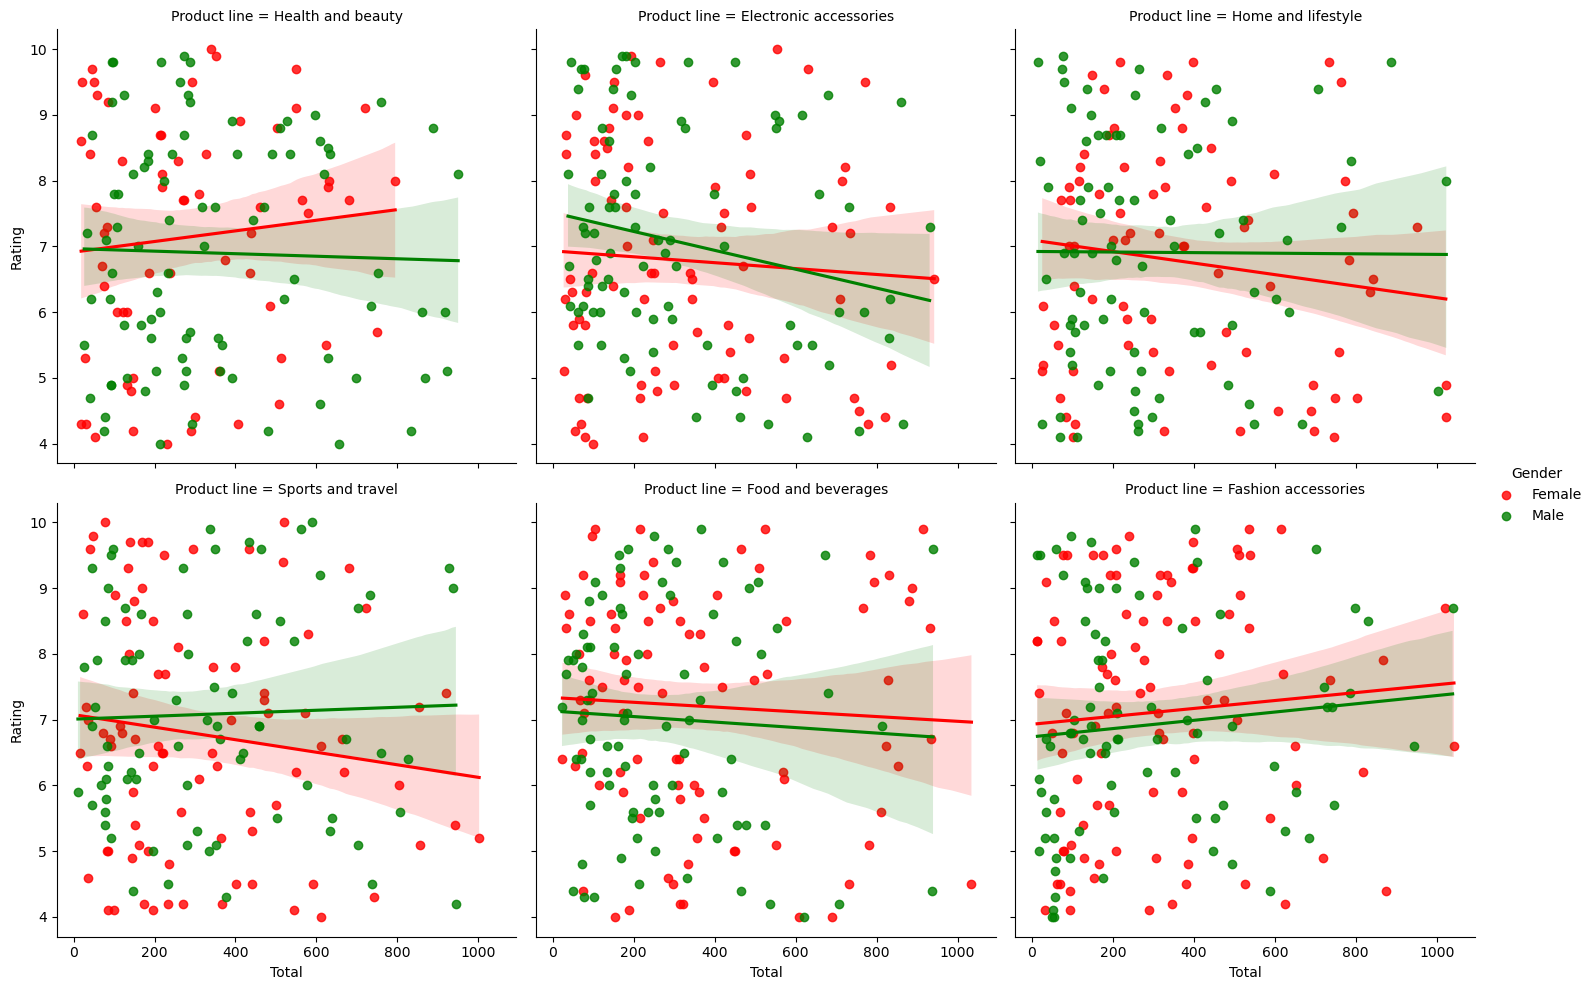

In [19]:
sns.lmplot(
    data=sales,
    x='Total',
    y='Rating',
    hue='Gender',
    col='Product line',
    col_wrap=3,
    palette=dict(Male="g", Female="r")
)

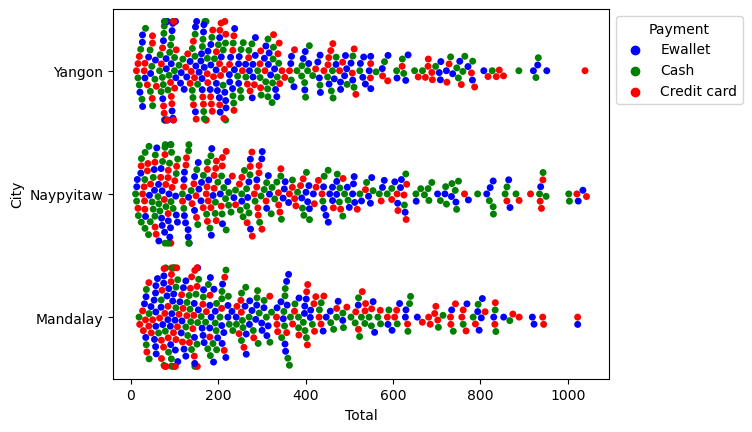

In [25]:
ax=sns.swarmplot(
    data=sales,
    x='Total',
    y='City',
    hue='Payment',
    palette={'Cash':'g','Credit card':'r','Ewallet':'b'}
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [31]:
x=sales['Total'].values.tolist()
len(x)

1000

In [37]:
x=sales['Total'].values
y=np.linspace(0,999,1000)

<Axes: ylabel='Total'>

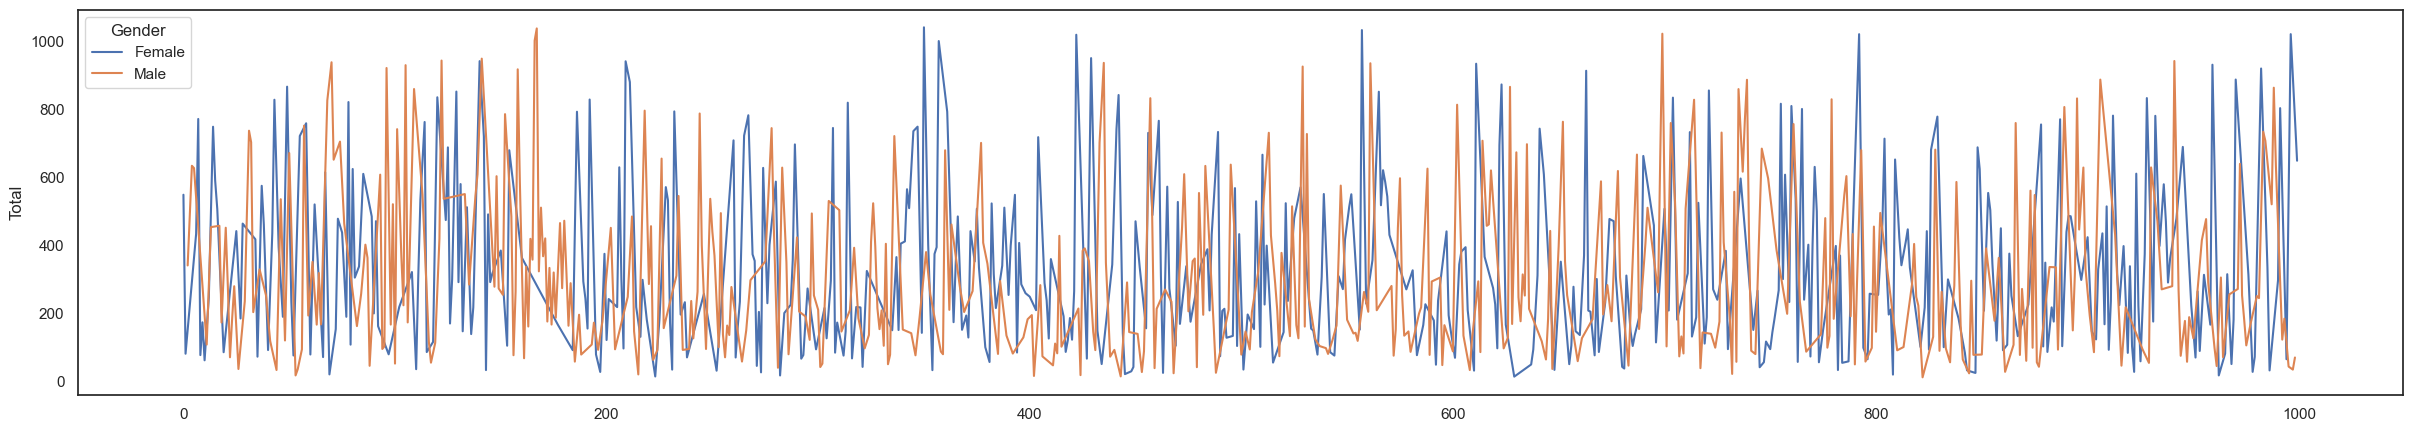

In [46]:
sns.set_theme(style='white',rc={'figure.figsize':(30,5)})
sns.lineplot(
    data=sales,
    x=np.linspace(0,999,1000),
    y=sales['Total'],
    hue='Gender'
)
# 아무 실제적 의미는 없고 단지 테크닉 테스트를 위한 작업!

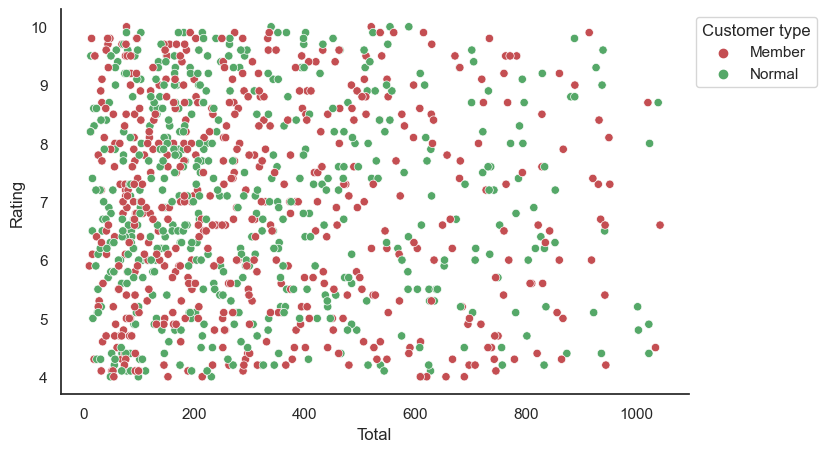

In [55]:
sns.set_theme(style='white',rc={'figure.figsize':(8.1,5)})

ax=sns.scatterplot(
    data=sales,
    x='Total',
    y='Rating',
    hue='Customer type',
    palette={'Member':'r','Normal':'g'}
)

sns.despine()

sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

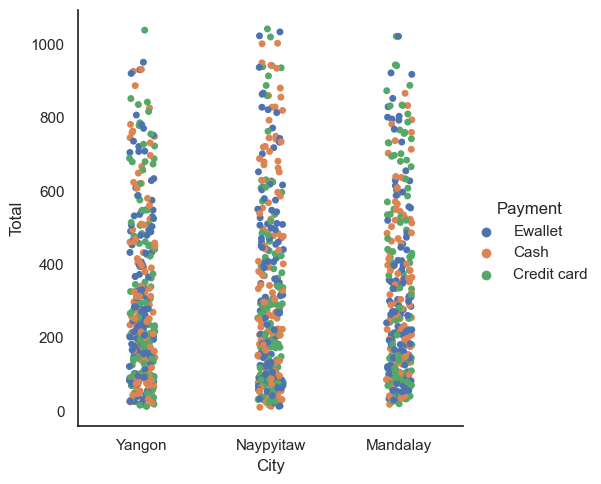

In [61]:
sns.catplot(
    data=sales,
    x='City',
    y='Total',
    hue='Payment'
)

In [74]:
sales=pd.read_csv('supermarket_sales.csv', index_col='Invoice ID')
newtime=sales['Date']+" "+sales['Time']
newtime=pd.to_datetime(newtime)

In [75]:
sales.insert(0,'newTime', newtime)

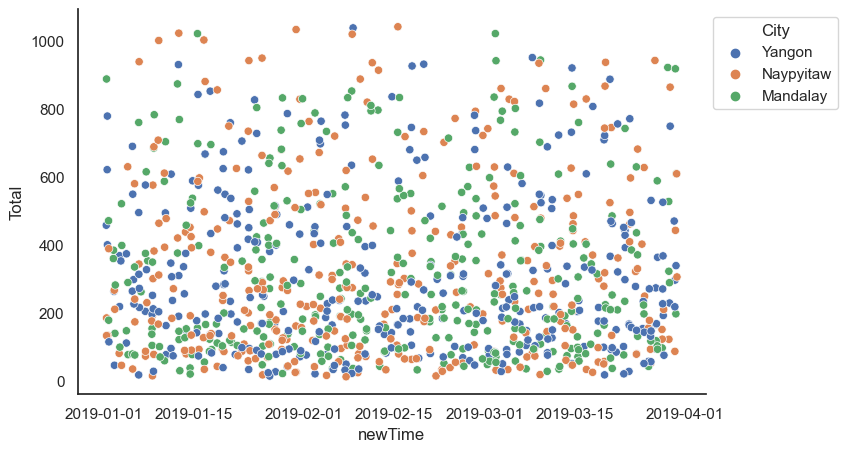

In [81]:
ax=sns.scatterplot(
    data=sales,
    x='newTime',
    y='Total',
    hue='City'
)
sns.despine()
sns.move_legend(ax,'upper left', bbox_to_anchor=(1,1))